In [1]:
import datetime as dt
import pandas_datareader.data as web
import itertools as it

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150

In [2]:
def get_price_from_morningstar(ticker):
    start = dt.datetime(2015,1,1) # 시작날짜
    end = dt.datetime.now() # 현재날짜

    df = web.DataReader(ticker, 'stooq', start, end) # STOOQ API 사용
    # df.reset_index(inplace=True) # index 재설정
    # df.set_index('Date', inplace=True) # 날짜행 인덱스 지정
    # df = df.drop("Symbol", axis=1) # 종목코드행 삭제
    
    return df

In [3]:
tickers = ["EWA",  # iShares MSCI Australia Index ETF
                        "EWO",  # iShares MSCI Austria Investable Mkt Index ETF
                        "EWK",  # iShares MSCI Belgium Investable Market Index ETF
                        "EWZ",  # iShares MSCI Brazil Index ETF
                        "EWC",  # iShares MSCI Canada Index ETF
                        "FXI",  # iShares China Large-Cap ETF
                        "EWQ",  # iShares MSCI France Index ETF
                        "EWG",  # iShares MSCI Germany ETF 
                        "EWH",  # iShares MSCI Hong Kong Index ETF
                        "EWI",  # iShares MSCI Italy Index ETF
                        "EWJ",  # iShares MSCI Japan Index ETF
                        "EWM",  # iShares MSCI Malaysia Index ETF
                        "EWW",  # iShares MSCI Mexico Inv. Mt. Idx
                        "EWN",  # iShares MSCI Netherlands Index ETF
                        "EWS",  # iShares MSCI Singapore Index ETF
                        "EZA",  # iShares MSCI South Africe Index ETF
                        "EWY",  # iShares MSCI South Korea ETF
                        "EWP",  # iShares MSCI Spain Index ETF
                        "EWD",  # iShares MSCI Sweden Index ETF
                        "EWL",  # iShares MSCI Switzerland Index ETF
                        "EWT",  # iShares MSCI Taiwan Index ETF
                        "THD",  # iShares MSCI Thailand Index ETF
                        "EWU",  # iShares MSCI United Kingdom Index ETF
                        "SPY",  # SPDR S&P 500 ETF
                        ]

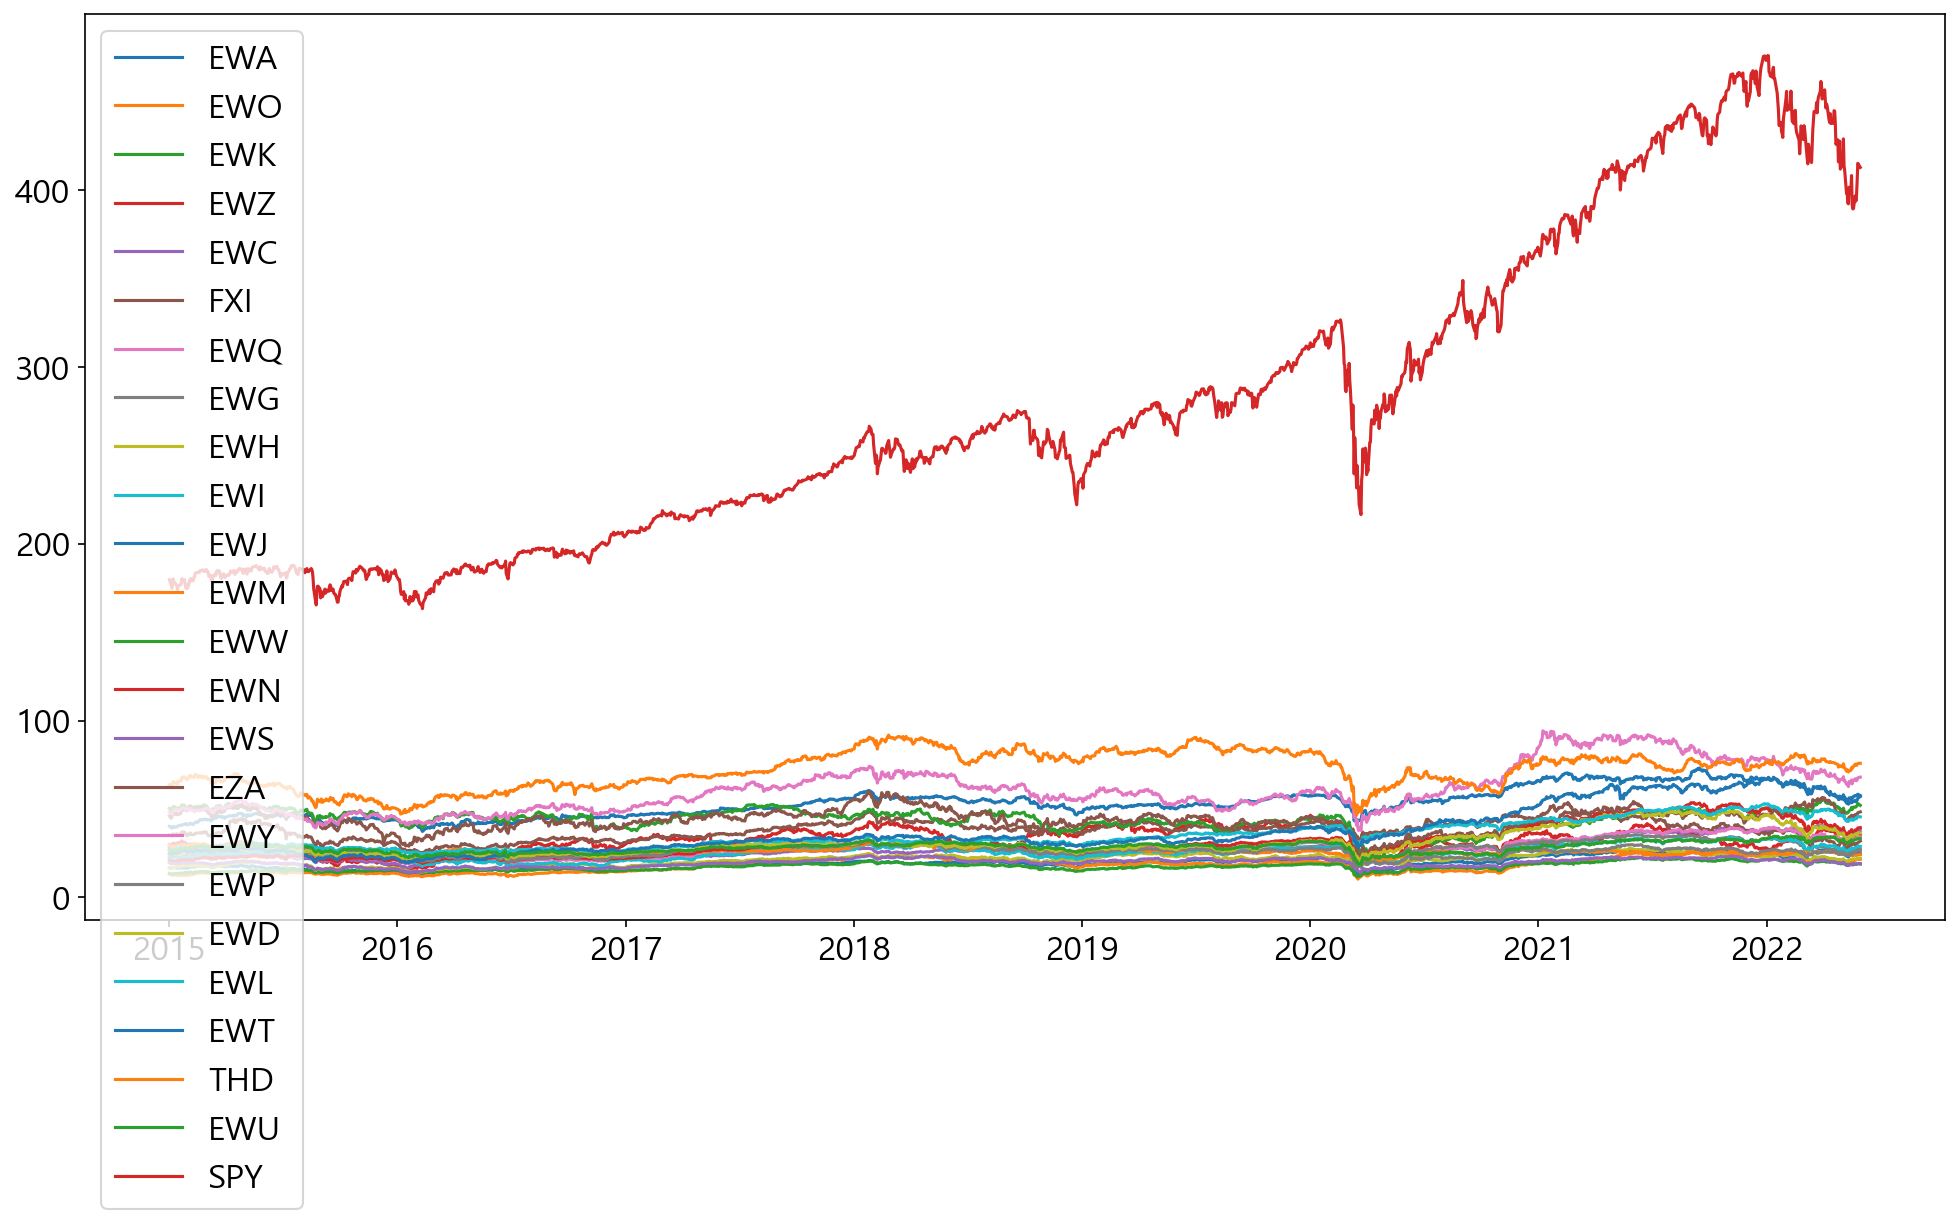

In [4]:
# 종가만 모아보자
# 데이터 시각화
stocks = dict()
legend = []

for ticker in tickers:
    price = get_price_from_morningstar(ticker)
    stocks[ticker] = price['Close'].values[:].tolist()
    legend.append(ticker)

# dict -> Dataframe
prices = pd.DataFrame(stocks)
prices.head()

# index 수정
prices.index = price.index
# prices.head()

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16,8))

plt.plot(prices)
plt.legend(legend, loc='upper left')


In [5]:
prices.sort_index(inplace=True)

In [6]:
cash = 100000
period = 120
max_traded_pairs = 5 # the top 5 pairs with the smallest distance are used.
total_portfolio_value = cash
jango_value = 0
jango = []

traded_pairs = []
traded_quantity = {}

sorted_pairs = []
symbol_pairs = list(it.combinations(tickers, 2))

In [7]:
index = period + 1
# while index <= prices.shape[0]:
history_prices = prices.shift(1)[index - period : index]

In [8]:
# history_price를 만들어서 그걸 업데이트하고 -> 완료
# 다른건 history_price를 바라보게 하면 편할까?

pairs_to_remove = []

def Distance(price_a, price_b):
    # Calculate the sum of squared deviations between two normalized price series
    norm_a = np.array(price_a) / price_a[0]
    norm_b = np.array(price_b) / price_b[0]
    return sum((norm_a - norm_b)**2)

In [9]:
distances = {}
for pair in symbol_pairs:
    distances[pair] = Distance(history_prices[pair[0]], history_prices[pair[1]])

if len(distances) != 0:
    sorted_pairs = sorted(distances.items(), key=lambda x: x[1])[:max_traded_pairs]